# Introduction
 From the wine dataset i have tried to gain insights to develop a machine learning model & DL model that is capable of accurately predicting wine quality.

 Multiple factors contribute to the overall quality of a wine. These factors include Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline

Try to built neural network & ML models that help us to predict wine quality with the help of given feature

*   with only 20 Epochs achieve 100% accuracy
*   Using Logistic Regression achieve accuracy 98%
*   Using Decision Tree Model achieve 96% accuracy
*   Using using Random forest model achieve 100% accuracy






# Features in Dataset

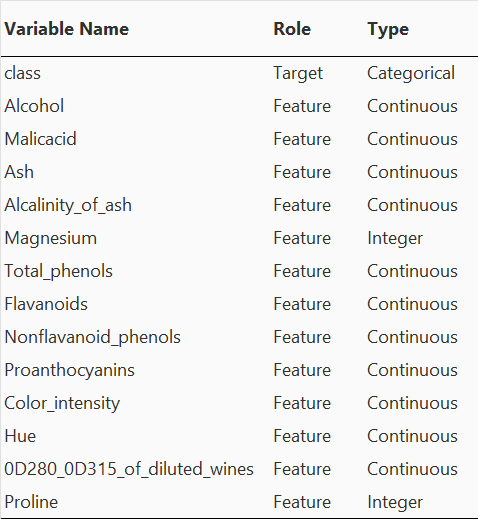

# Import and data loading

In [14]:
#Data Input
import pandas as pd
import numpy as np

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # removing warning
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/wine.csv')

In [4]:
df.head()

class  Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23       1.71  2.43               15.6        127   
1      1    13.20       1.78  2.14               11.2        100   
2      1    13.16       2.36  2.67               18.6        101   
3      1    14.37       1.95  2.50               16.8        113   
4      1    13.24       2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  0D280_0D315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [5]:
df.columns = ['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids',
              'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

# EDA - Exploratory Data Analysis

In [6]:
df.shape

(178, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [8]:
df.isna().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [9]:
df.duplicated().sum()

0

1.   The dataset contains only continuous and numeric features.
2.   No NaNs nor duplicated detected as per information given

In [10]:
df.describe()

class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

*   We have different scales across the attributes. We may benefit from using rescaling methods, such as StandardScaling.

# Visualization

In [11]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [12]:
df['class'].value_counts(normalize=True)*100

class
2    39.887640
1    33.146067
3    26.966292
Name: proportion, dtype: float64

class



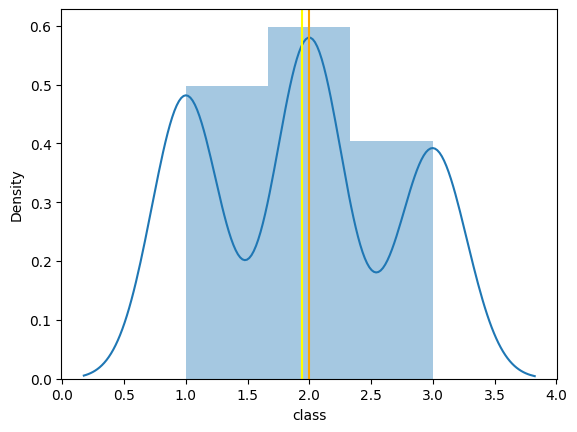

**************************************************

Alcohol



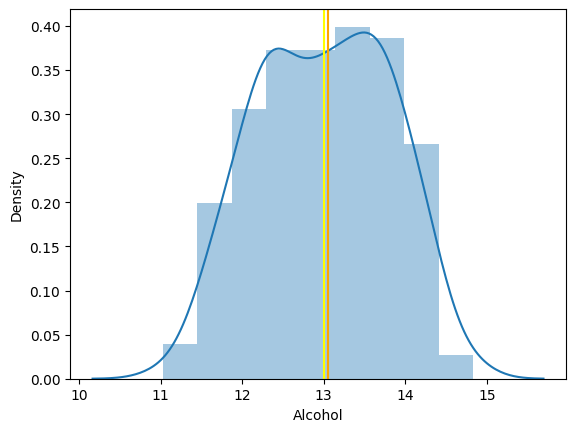

**************************************************

Malic acid



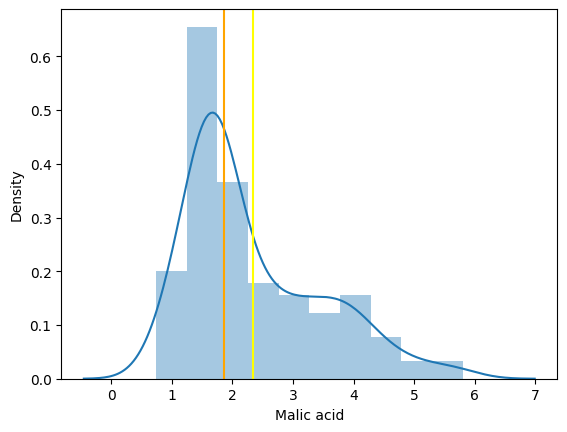

**************************************************

Ash



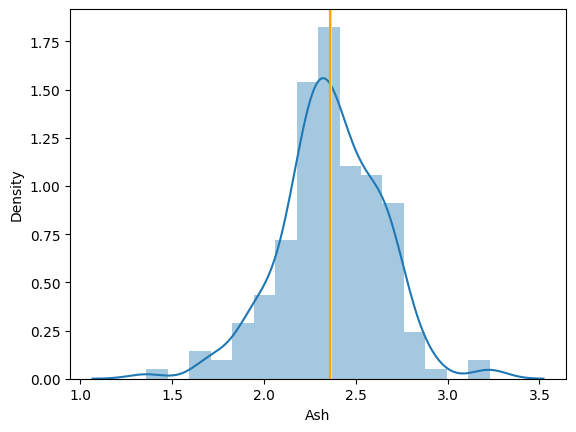

**************************************************

Alcalinity of ash



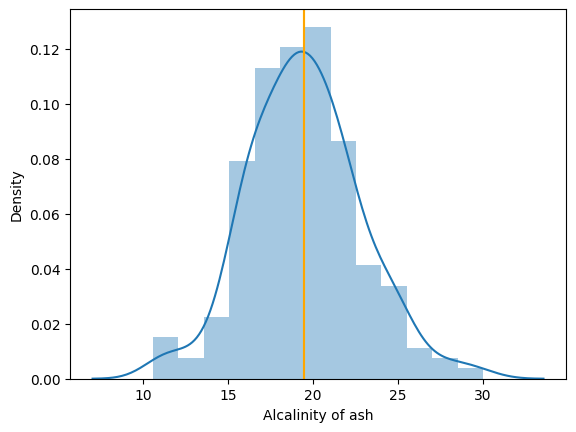

**************************************************

Magnesium



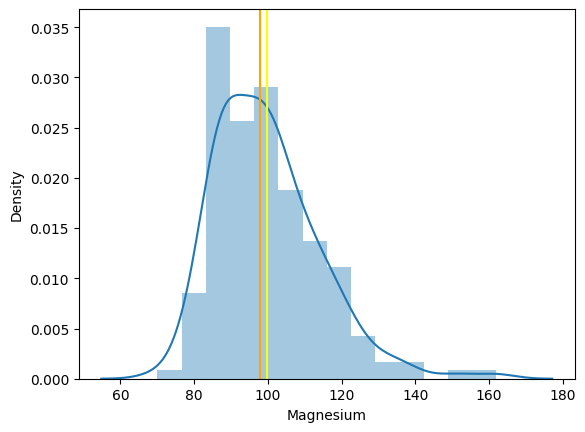

**************************************************

Total phenols



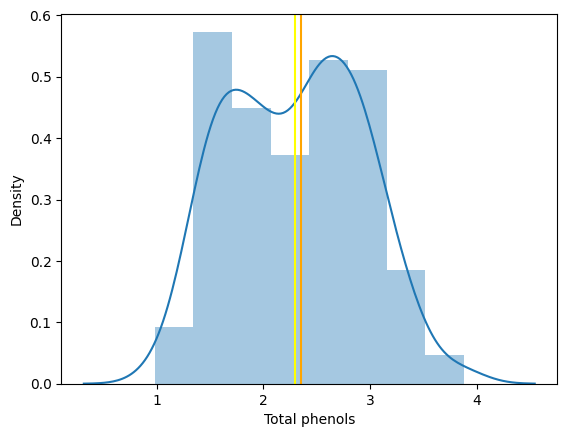

**************************************************

Flavanoids



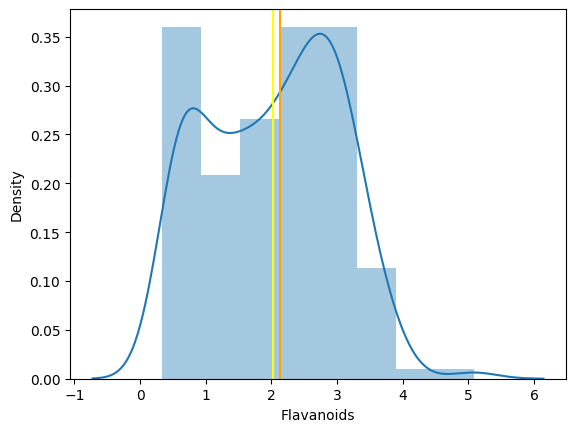

**************************************************

Nonflavanoid phenols



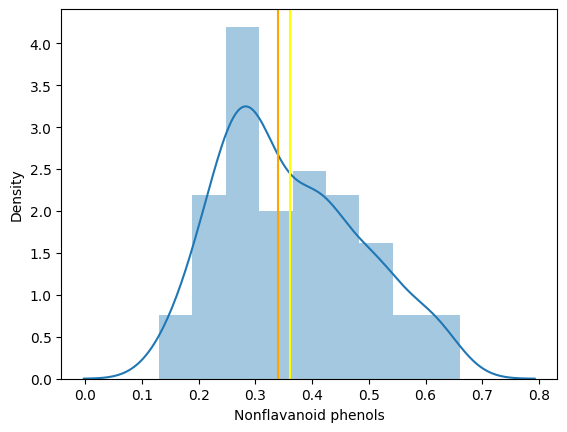

**************************************************

Proanthocyanins



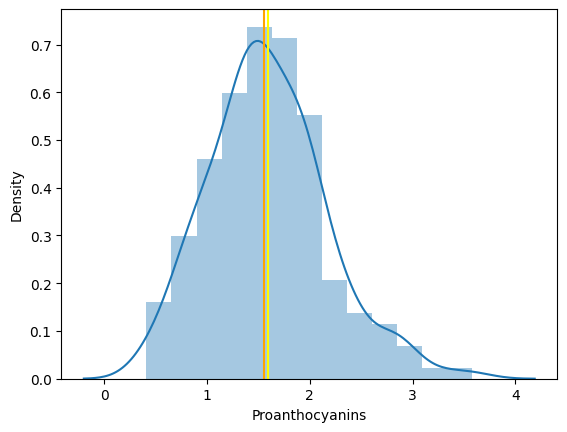

**************************************************

Color intensity



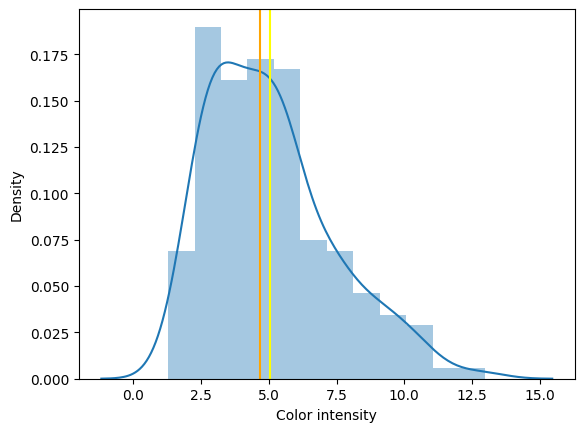

**************************************************

Hue



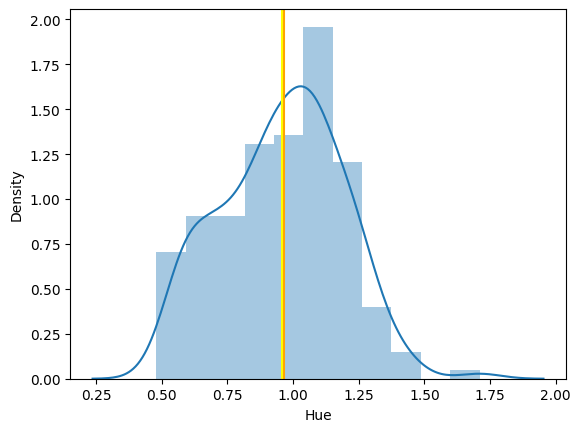

**************************************************

OD280/OD315 of diluted wines



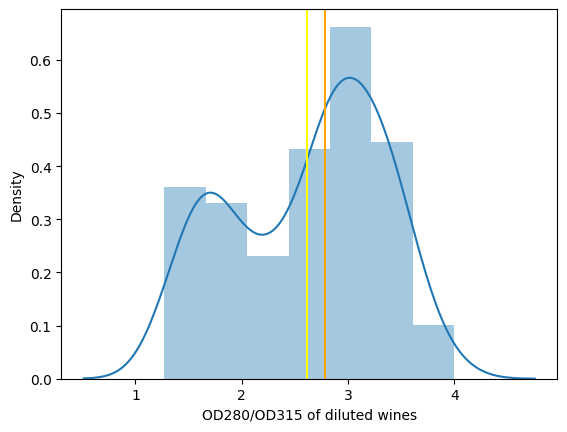

**************************************************

Proline



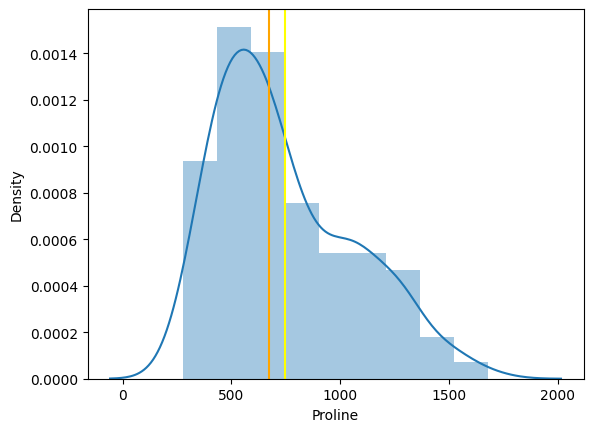

**************************************************



In [19]:
# will see distribution of data
for i in df:
  print(i)
  print()
  sns.distplot(df[i])
  plt.axvline(df[i].mean(),color='yellow')
  plt.axvline(df[i].median(),color='orange')
  plt.show()
  print('*'*50)
  print()

**Prediction from Graph** : most of the distributions are not normally distributed


class
Axes(0.125,0.11;0.775x0.77)


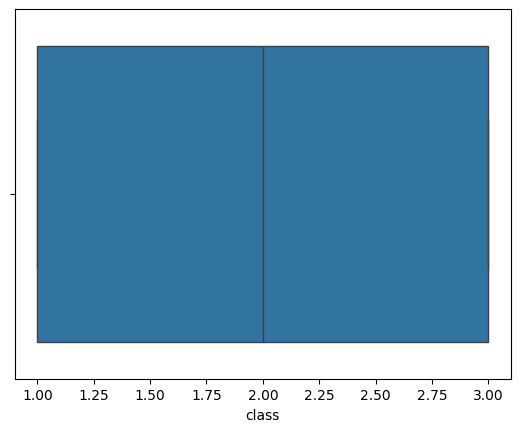

Alcohol
Axes(0.125,0.11;0.775x0.77)


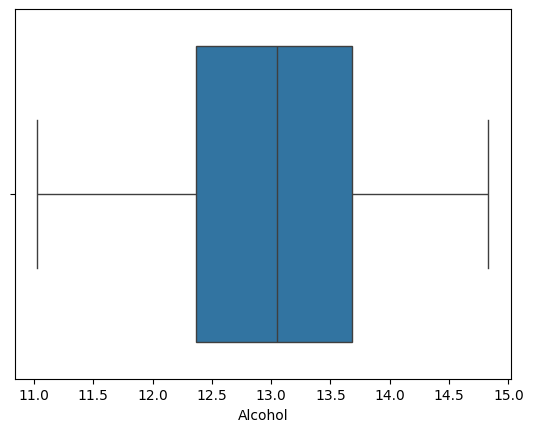

Malic acid
Axes(0.125,0.11;0.775x0.77)


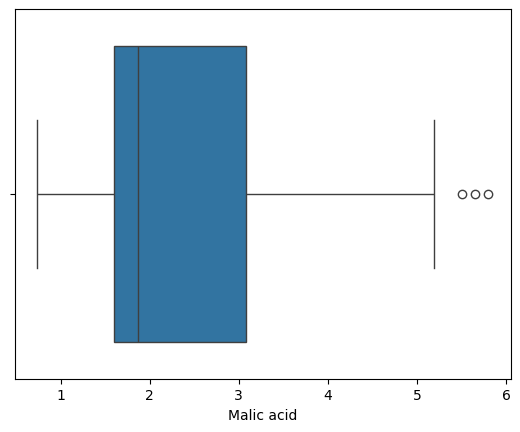

Ash
Axes(0.125,0.11;0.775x0.77)


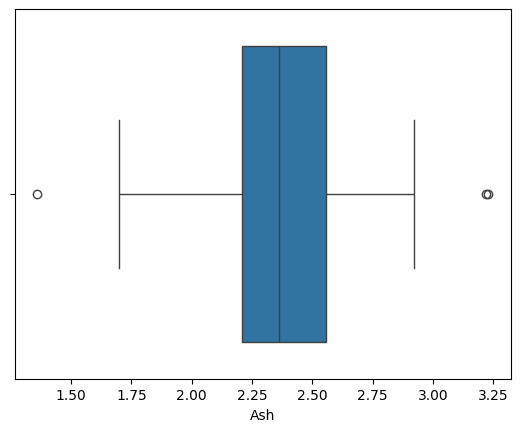

Alcalinity of ash
Axes(0.125,0.11;0.775x0.77)


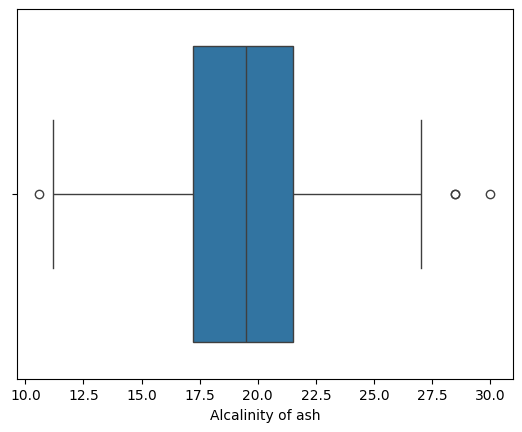

Magnesium
Axes(0.125,0.11;0.775x0.77)


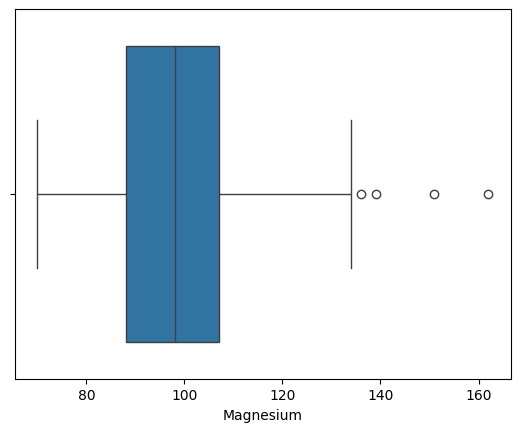

Total phenols
Axes(0.125,0.11;0.775x0.77)


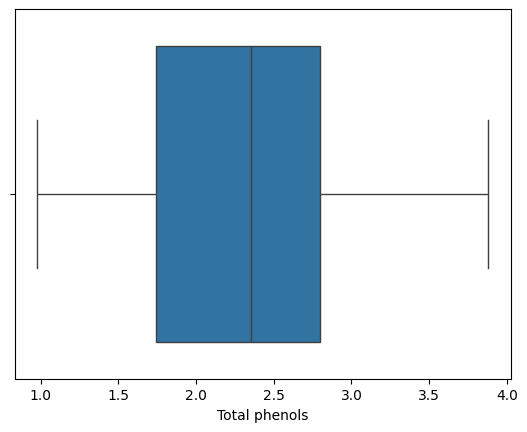

Flavanoids
Axes(0.125,0.11;0.775x0.77)


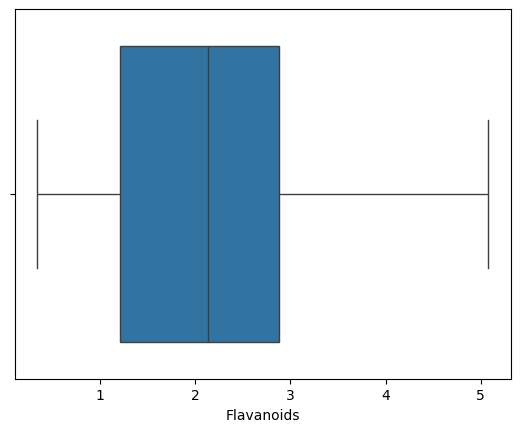

Nonflavanoid phenols
Axes(0.125,0.11;0.775x0.77)


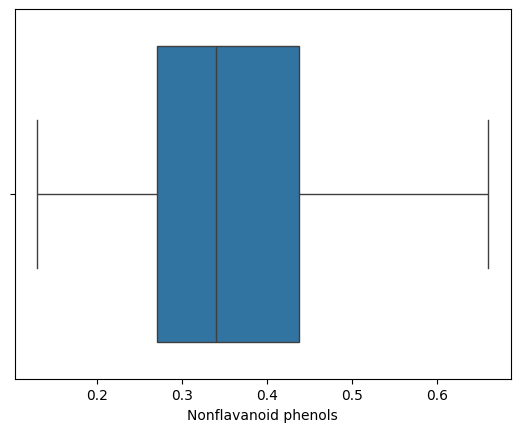

Proanthocyanins
Axes(0.125,0.11;0.775x0.77)


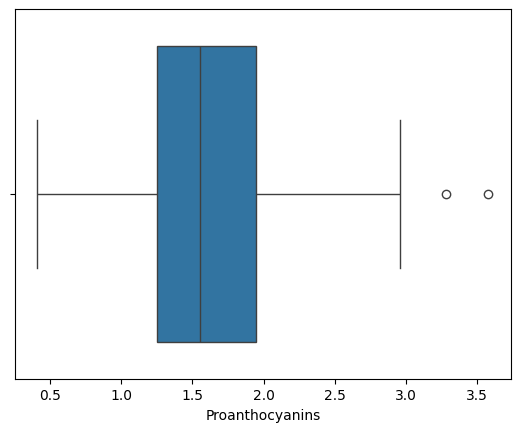

Color intensity
Axes(0.125,0.11;0.775x0.77)


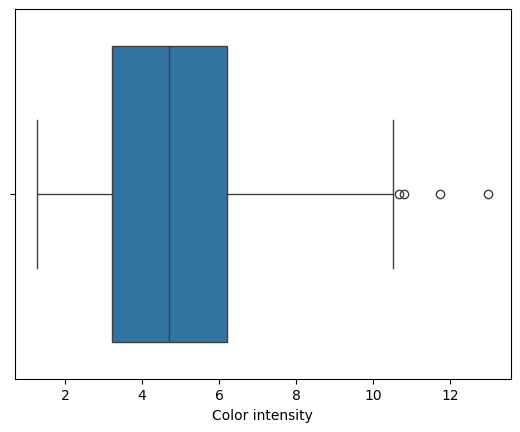

Hue
Axes(0.125,0.11;0.775x0.77)


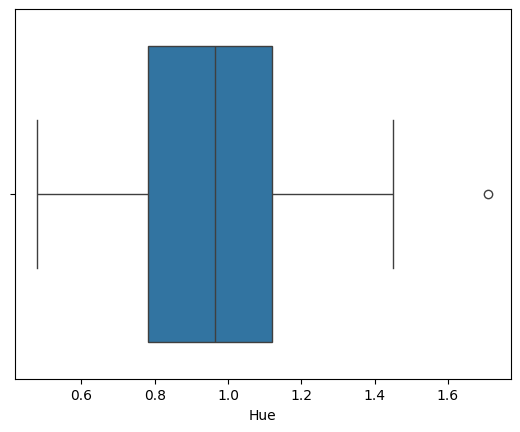

OD280/OD315 of diluted wines
Axes(0.125,0.11;0.775x0.77)


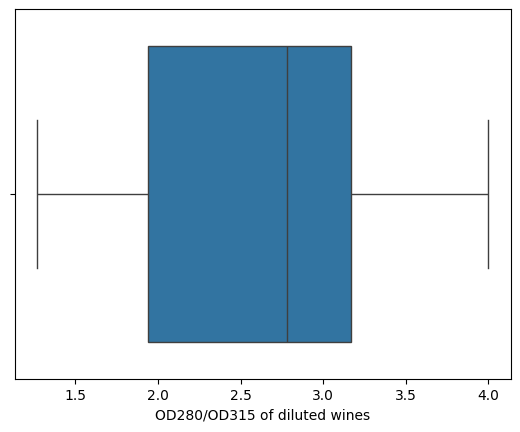

Proline
Axes(0.125,0.11;0.775x0.77)


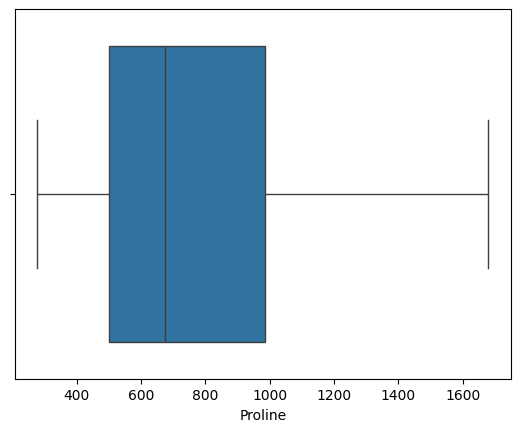

In [ ]:
# Outlier analysis

for i in df:
  print(i)
  print(sns.boxplot(df[i],orient='h'))
  plt.show()

# Bivariate analysis

Alcohol


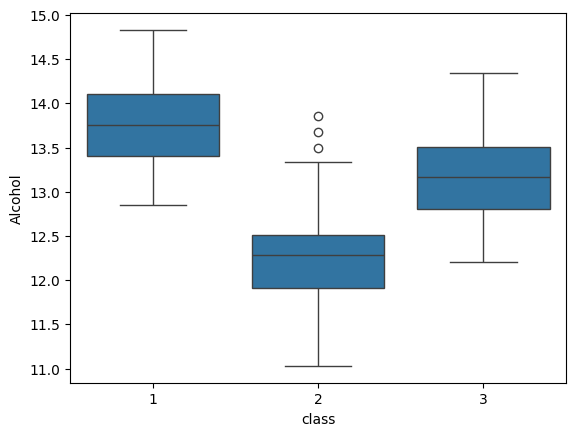

**************************************************
Malic acid


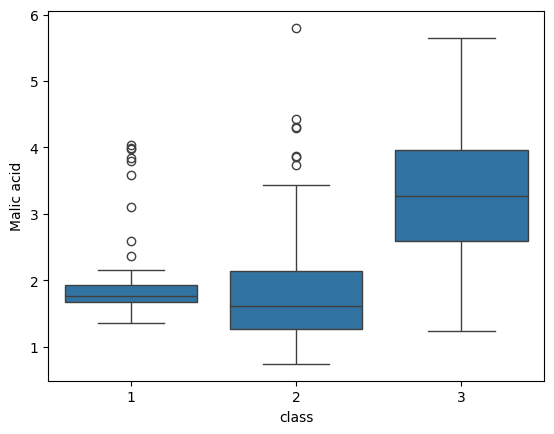

**************************************************
Ash


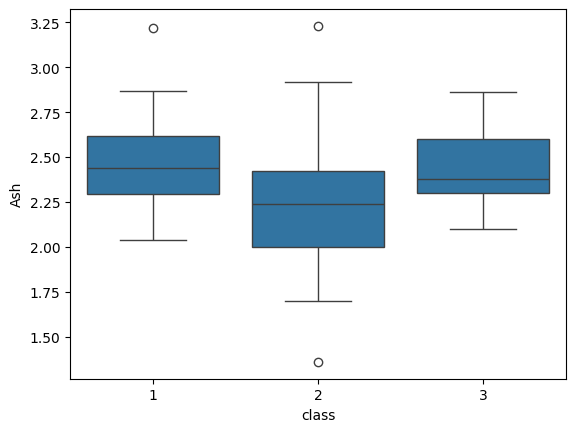

**************************************************
Alcalinity of ash


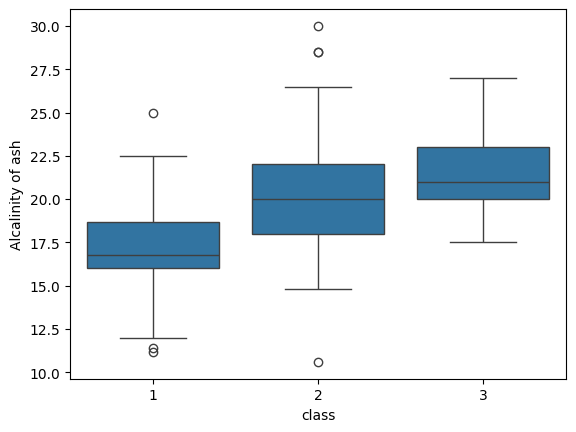

**************************************************
Magnesium


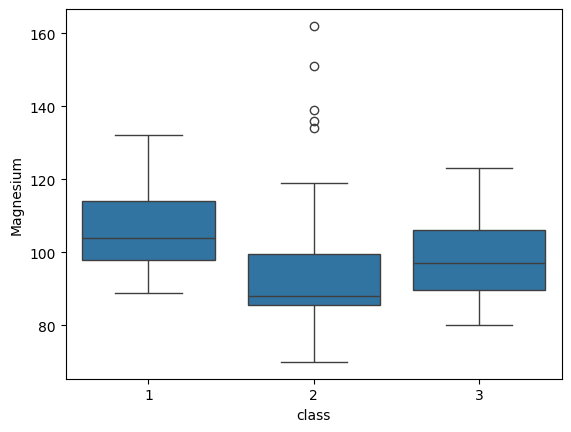

**************************************************
Total phenols


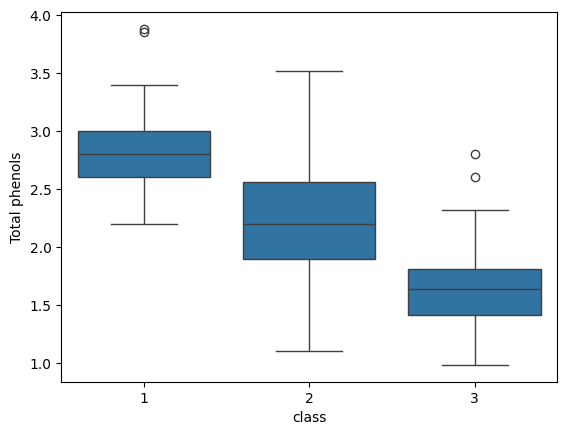

**************************************************
Flavanoids


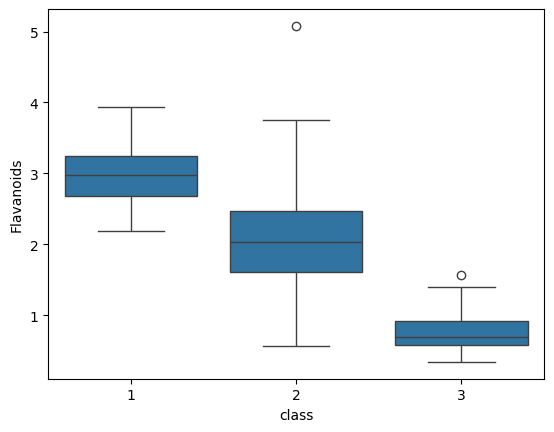

**************************************************
Nonflavanoid phenols


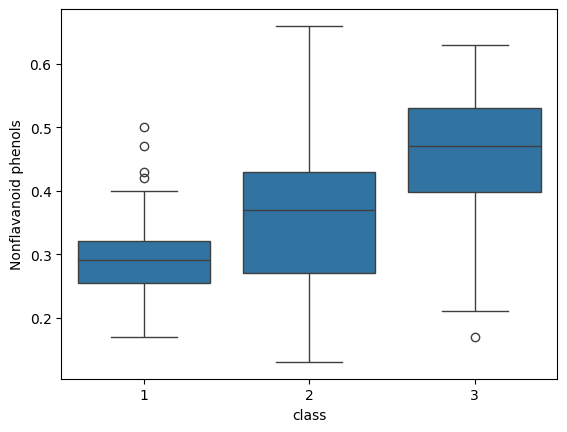

**************************************************
Proanthocyanins


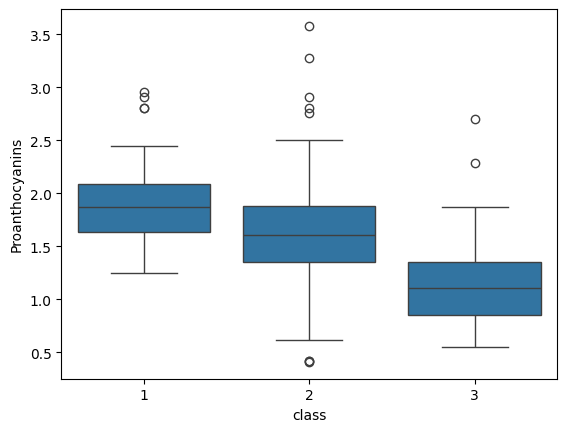

**************************************************
Color intensity


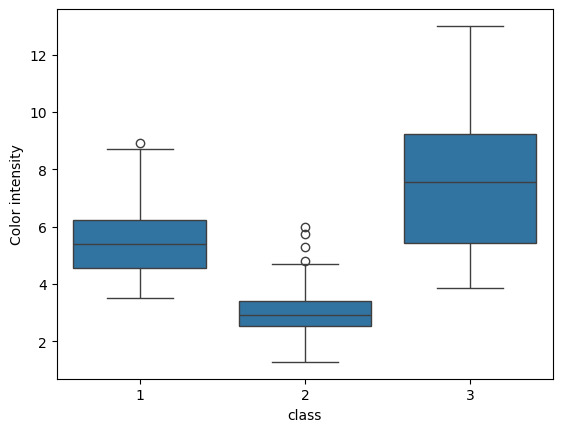

**************************************************
Hue


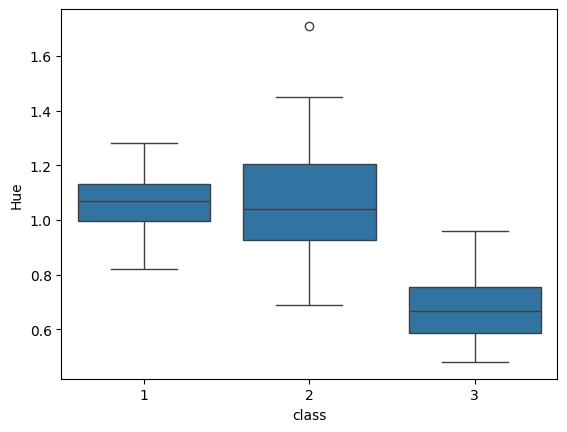

**************************************************
OD280/OD315 of diluted wines


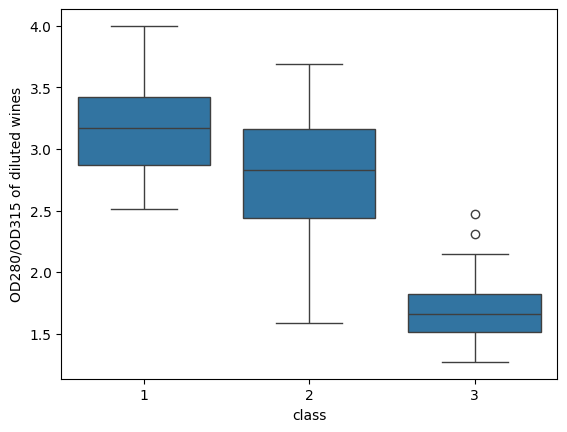

**************************************************
Proline


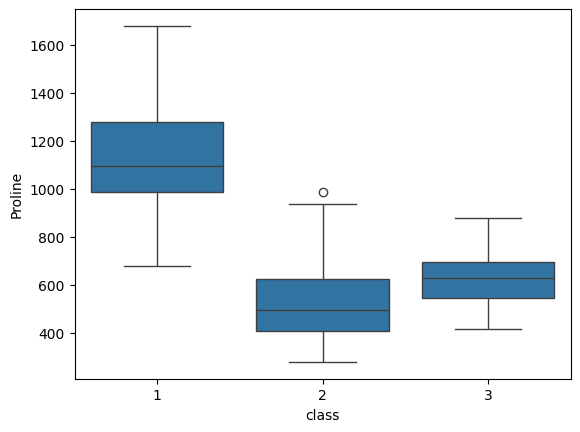

**************************************************


In [138]:
col_list = df.columns.drop('class')
for i in col_list:
    print(i)
    sns.boxplot(x='class',y=i,data=df)
    plt.show()
    print("*"*50)

# Multivariate Analysis

In [ ]:
corr = df.corr()
corr

class   Alcohol  Malic acid       Ash  \
class                         1.000000 -0.328222    0.437776 -0.049643   
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230  0.072343   -0.368710  0.003911   
Proline                      -0.633717  0.643720   -0.192011  0.223626   

                              Alcalinity of ash  Magnesium  Total phenols  \
class                                  0.517859  -0.209179      -0.719163   
Alcohol                               -0.310235   0.270798       0.289101   
Malic acid                             0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity of ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Color intensity                        0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
OD280/OD315 of diluted wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid phenols  \
class                          -0.847498              0.489109   
Alcohol                         0.236815             -0.155929   
Malic acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity of ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Color intensity                -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280/OD315 of diluted wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Color intensity       Hue  \
class                               -0.499130         0.265668 -0.617369   
Alcohol                              0.136698         0.546364 -0.071747   
Malic acid                          -0.220746         0.248985 -0.561296   
Ash                                  0.009652         0.258887 -0.074667   
Alcalinity of ash                   -0.197327         0.018732 -0.273955   
Magnesium                            0.236441         0.199950  0.055398   
Total phenols                        0.612413        -0.055136  0.433681   
Flavanoids                           0.652692        -0.172379  0.543479   
Nonflavanoid phenols                -0.365845         0.139057 -0.262640   
Proanthocyanins

In [ ]:
sns.heatmap(corr,annot=True, cmap='Blues')

**Predictions** :
*  The highest correlated feature with the target variable class is Alcalinity of ash, with 0.48 correlation.

*  The highest positive correlation is between Total phenols & Flavanoids, at 0.864564


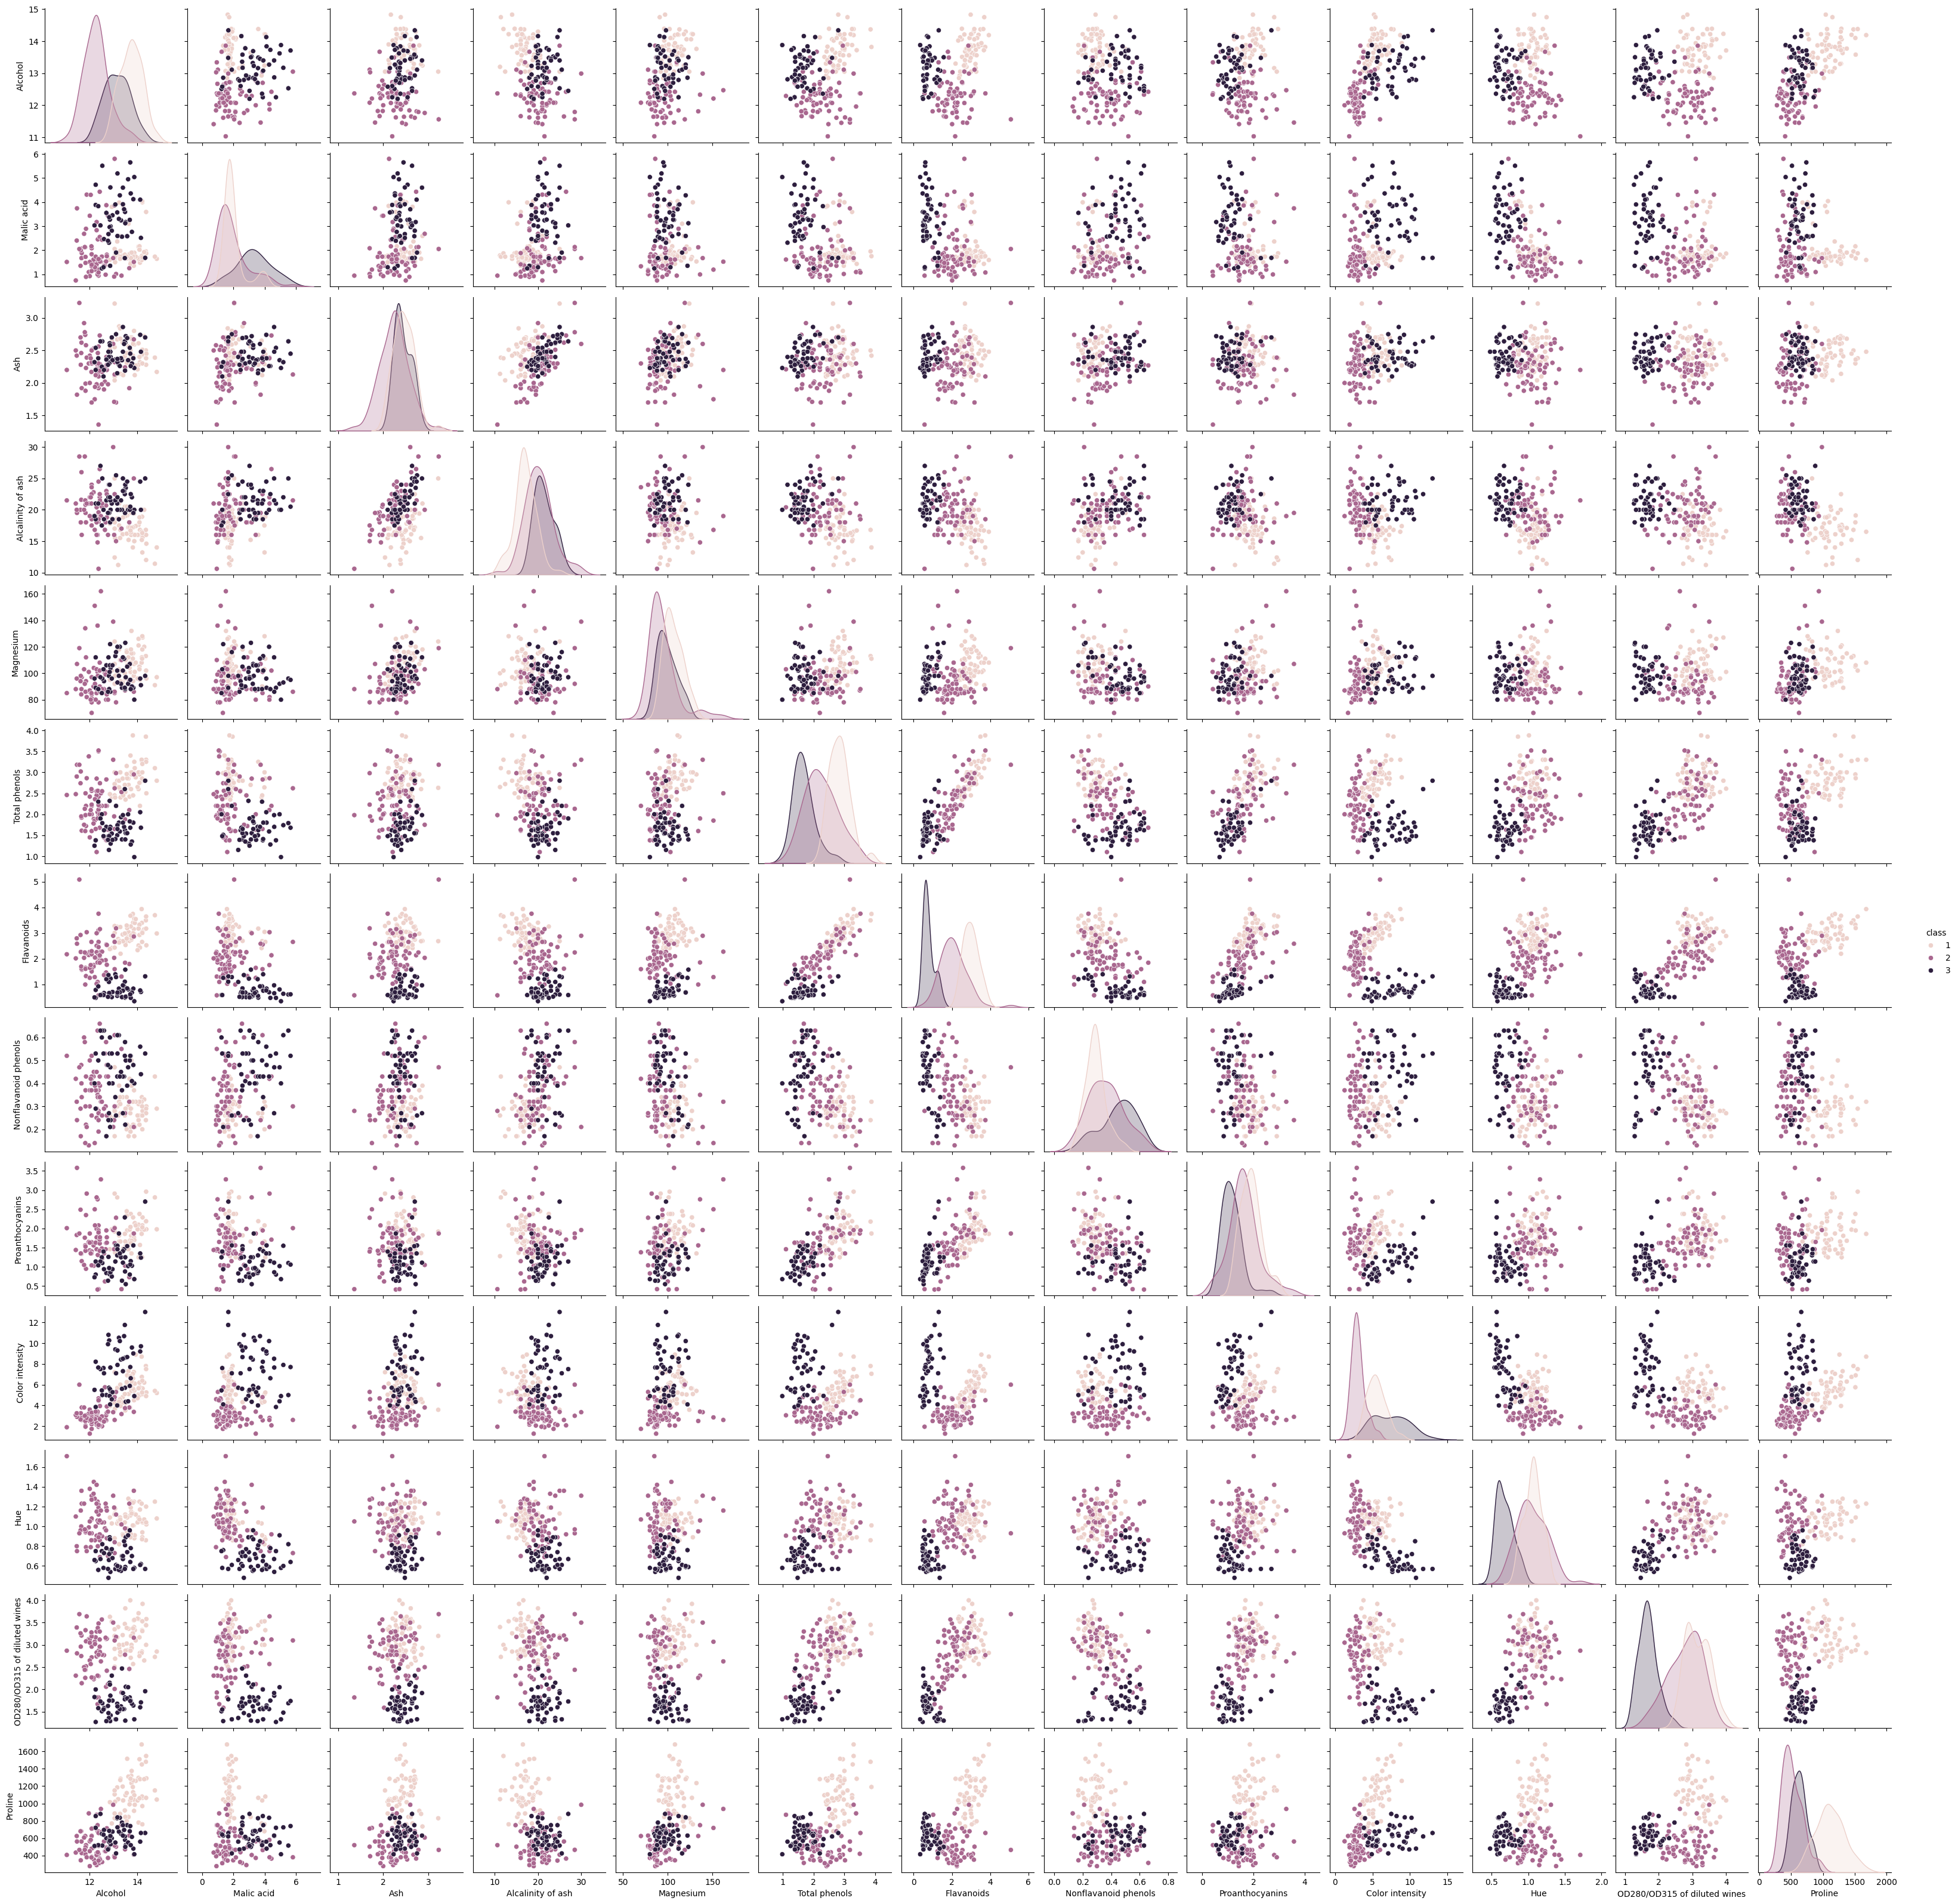

In [141]:
sns.pairplot(df, hue='class')

# Model Building

In [20]:
x = df.drop(columns ='class')
y = df['class']

Standarization

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(x)

In [22]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(124, 13) (54, 13) (124,) (54,)


# Logistic Regression ModeL

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logisticRegr = LogisticRegression()

In [26]:
# Model Fitting/Training

logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [27]:
test_pred = logisticRegr.predict(X_test)

In [28]:
pred = pd.DataFrame()
pred["y_test"] = y_test  #actual answer key
pred["y_pred"] = test_pred  #answers given by model
pred

y_test  y_pred
19        1       1
45        1       1
140       3       3
30        1       1
67        2       2
16        1       1
119       2       2
174       3       3
109       2       2
141       3       3
24        1       1
150       3       3
41        1       1
118       2       2
15        1       1
111       2       2
113       2       2
82        2       2
9         1       1
114       2       2
18        1       1
66        2       2
60        2       2
169       3       3
171       3       3
164       3       3
117       2       2
65        2       2
90        2       2
55        1       1
29        1       1
128       2       2
145       3       3
31        1       1
12        1       1
42        1       1
158       3       3
137       3       3
98        2       2
159       3       3
38        1       1
108       2       2
85        2       2
68        2       3
143       3       3
2         1       1
100       2       2
122       2       2
154       3       3
51        1       1
76        2       2
56        1       1
26        1       1
153       3       3

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,test_pred)

0.9814814814814815

# Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [31]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
y_pred=clf.predict(X_test)

In [34]:
#Model Evaluation
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.91      1.00      0.95        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



# Random Forest Model

In [36]:
# Build our model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100 ) # number of decision trees

In [38]:
# Train the model

rf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
predictions = rf.predict(X_test)
predictions

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions, y_test)

1.0

# Deep Learning

Keras sequential API

In [41]:
# Import Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import keras
from keras import layers
from keras import ops
from keras.utils import to_categorical

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)
y_le = to_categorical(y_le)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y_le,test_size=.3,random_state=42)

In [44]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(124, 13) (54, 13) (124, 3) (54, 3)


In [45]:
classfier=Sequential()

#Input
classfier.add(Dense(13,activation='relu', input_dim=13))

#Hidden
classfier.add(Dense(32, activation='relu'))
classfier.add(Dense(32, activation='relu'))
classfier.add(Dense(32, activation='relu'))

#Output
classfier.add(Dense(3, activation='sigmoid'))

classfier.summary()
classfier.compile(optimizer='SGD', loss='crossentropy', metrics=['accuracy'])
classfier.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 13)                  │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,841 (11.10 KB)

 Trainable params: 2,841 (11.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.2594 - loss: 1.1460 - val_accuracy: 0.2593 - val_loss: 1.1308
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2730 - loss: 1.1205 - val_accuracy: 0.2407 - val_loss: 1.1148
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2658 - loss: 1.1121 - val_accuracy: 0.2963 - val_loss: 1.0989
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2735 - loss: 1.1045 - val_accuracy: 0.3704 - val_loss: 1.0832
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3190 - loss: 1.0883 - val_accuracy: 0.4815 - val_loss: 1.0674
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.3907 - loss: 1.0742 - val_accuracy: 0.5000 - val_loss: 1.0525
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4360 - loss: 1.0645 - val_accuracy: 0.5741 - val_loss: 1.0380
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5387 - loss: 1.0415 - val_accuracy: 0.6111 - val_loss: 1.0243

In [46]:
classfier=Sequential()

#Input
classfier.add(Dense(26,activation='relu', input_dim=13))

#Hidden
classfier.add(Dense(64, activation='relu'))
classfier.add(Dense(32, activation='relu'))
classfier.add(Dense(32, activation='relu'))

#Output
classfier.add(Dense(3, activation='sigmoid'))

classfier.summary()
classfier.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
classfier.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 26)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,327 (20.81 KB)

 Trainable params: 5,327 (20.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.4293 - loss: 1.0621 - val_accuracy: 0.4630 - val_loss: 1.0247
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5213 - loss: 0.9938 - val_accuracy: 0.5185 - val_loss: 0.9713
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6369 - loss: 0.9389 - val_accuracy: 0.6481 - val_loss: 0.9140
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6936 - loss: 0.8823 - val_accuracy: 0.8333 - val_loss: 0.8503
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8491 - loss: 0.8102 - val_accuracy: 0.8889 - val_loss: 0.7792
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8840 - loss: 0.7451 - val_accuracy: 0.8889 - val_loss: 0.7008
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9315 - loss: 0.6452 - val_accuracy: 0.9074 - val_loss: 0.6157
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9630 - loss: 0.5504 - val_accuracy: 0.9074 - val_loss: 0.5230


In [47]:
classfier=Sequential()

#Input
classfier.add(Dense(24,activation='relu', input_dim=13))

#Hidden
classfier.add(Dense(64, activation='relu'))
classfier.add(Dense(64, activation='relu'))
classfier.add(Dense(32, activation='relu'))

#Output
classfier.add(Dense(3, activation='softmax'))

classfier.summary()
classfier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = classfier.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 24)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,275 (32.32 KB)

 Trainable params: 8,275 (32.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.3136 - loss: 1.0999 - val_accuracy: 0.4815 - val_loss: 0.9987
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6039 - loss: 0.9428 - val_accuracy: 0.6667 - val_loss: 0.9093
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6588 - loss: 0.8963 - val_accuracy: 0.7963 - val_loss: 0.8273
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7941 - loss: 0.7656 - val_accuracy: 0.8704 - val_loss: 0.7385
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8155 - loss: 0.6938 - val_accuracy: 0.9074 - val_loss: 0.6481
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8379 - loss: 0.6284 - val_accuracy: 0.9259 - val_loss: 0.5591
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9049 - loss: 0.4966 - val_accuracy: 0.9259 - val_loss: 0.4741
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9103 - loss: 0.4078 - val_accuracy: 0.9630 - val_loss: 0.3968

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


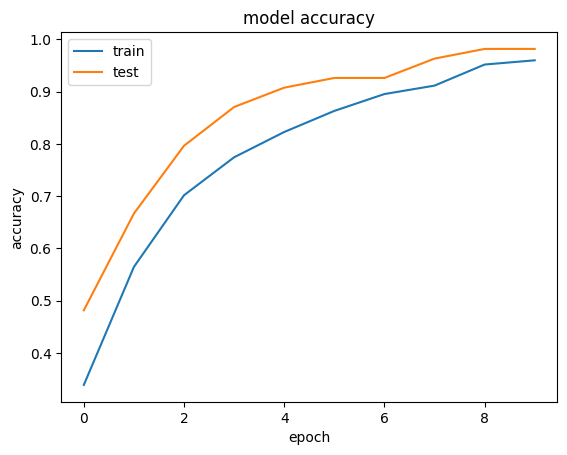

In [48]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

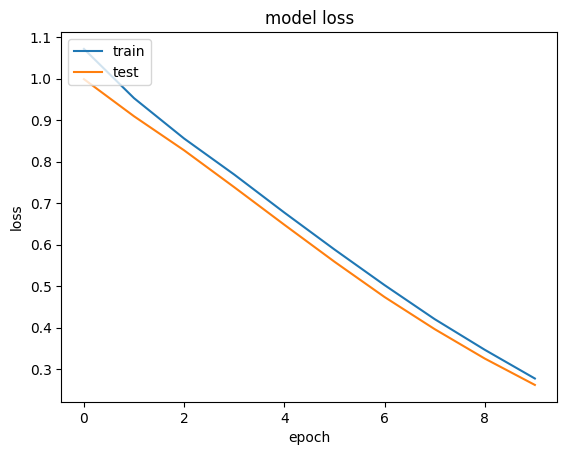

In [49]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
# Build the ANN model
classfier=Sequential()

#Input
classfier.add(Dense(26,activation='relu', input_dim=13))

#Hidden
classfier.add(Dense(64, activation='relu'))
classfier.add(Dense(64, activation='relu'))
classfier.add(Dense(32, activation='relu'))

#Output
classfier.add(Dense(3, activation='softmax'))

classfier.summary()

# Compile the model
classfier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history= classfier.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 26)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           1,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,431 (32.93 KB)

 Trainable params: 8,431 (32.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.4428 - loss: 1.1426 - val_accuracy: 0.6111 - val_loss: 1.0299
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6865 - loss: 0.9968 - val_accuracy: 0.8148 - val_loss: 0.9266
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8093 - loss: 0.8936 - val_accuracy: 0.9074 - val_loss: 0.8325
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8764 - loss: 0.7991 - val_accuracy: 0.9074 - val_loss: 0.7401
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9018 - loss: 0.7077 - val_accuracy: 0.9444 - val_loss: 0.6415
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9125 - loss: 0.6275 - val_accuracy: 0.9630 - val_loss: 0.5409
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9095 - loss: 0.5093 - val_accuracy: 0.9630 - val_loss: 0.4359
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9493 - loss: 0.3991 - val_accuracy: 0.9630 - val_loss: 0.3391


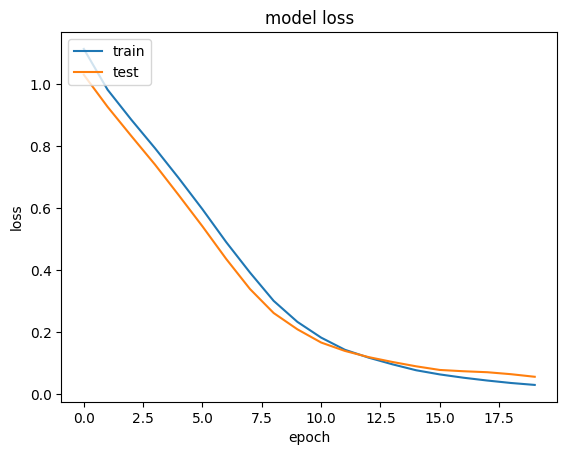

In [51]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()